# Distribution of High - Low - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
daily_data = data.copy().resample('D').agg({
        'Volume': 'sum',
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
daily_data.dropna(subset=['Close'], inplace=True)

In [5]:
dfd = daily_data[['High', 'Low']].copy().rename(columns={'High': 'day_High', 'Low': 'day_Low'})
dfc = data.copy()
dfc = dfc.assign(time_d=pd.PeriodIndex(dfc.index, freq='1D').to_timestamp())
df_merged = pd.merge(dfc, dfd, left_on="time_d", right_index=True, how="left")
df_merged['is_max'] = df_merged['High'] == df_merged['day_High']
df_merged['is_min'] = df_merged['Low'] == df_merged['day_Low']
df_merged['hour'] = df_merged.index.hour
df_merged['minute'] = df_merged.index.minute

In [6]:
df_merged[(df_merged.is_max == True) | (df_merged.is_min == True)]

,Open,High,Low,Close,Volume,time_d,day_High,day_Low,is_max,is_min,hour,minute
Date,,,,,,,,,,,,
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,2018-08-13,954.6,942.3,False,True,9,15
2018-08-13 10:50:00,943.6,943.8,942.3,943.2,1541,2018-08-13,954.6,942.3,False,True,10,50
2018-08-13 14:25:00,953.5,954.6,953.1,954.1,2418,2018-08-13,954.6,942.3,True,False,14,25
2018-08-14 11:10:00,952.9,953.3,952.1,952.3,1416,2018-08-14,961.8,952.1,False,True,11,10
2018-08-14 14:05:00,960.8,961.8,960.8,961.2,2464,2018-08-14,961.8,952.1,True,False,14,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-17 14:20:00,1974.0,1977.0,1960.0,1968.2,15227,2025-10-17,2017.5,1960.0,False,True,14,20
2025-10-20 09:00:00,1969.1,1969.9,1959.1,1961.0,12853,2025-10-20,1969.9,1861.0,True,False,9,0
2025-10-20 14:45:00,1861.0,1861.0,1861.0,1861.0,5231,2025-10-20,1969.9,1861.0,False,True,14,45


## 4. Distribution by min-max at 9h

In [30]:
df4 = df_merged[(df_merged.is_max == True) | (df_merged.is_min == True)]

,Open,High,Low,Close,Volume,time_d,day_High,day_Low,is_max,is_min,hour,minute
Date,,,,,,,,,,,,
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,2018-08-13,954.6,942.3,False,True,9,15
2018-08-13 10:50:00,943.6,943.8,942.3,943.2,1541,2018-08-13,954.6,942.3,False,True,10,50
2018-08-13 14:25:00,953.5,954.6,953.1,954.1,2418,2018-08-13,954.6,942.3,True,False,14,25
2018-08-14 11:10:00,952.9,953.3,952.1,952.3,1416,2018-08-14,961.8,952.1,False,True,11,10
2018-08-14 14:05:00,960.8,961.8,960.8,961.2,2464,2018-08-14,961.8,952.1,True,False,14,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-17 14:20:00,1974.0,1977.0,1960.0,1968.2,15227,2025-10-17,2017.5,1960.0,False,True,14,20
2025-10-20 09:00:00,1969.1,1969.9,1959.1,1961.0,12853,2025-10-20,1969.9,1861.0,True,False,9,0
2025-10-20 14:45:00,1861.0,1861.0,1861.0,1861.0,5231,2025-10-20,1969.9,1861.0,False,True,14,45


In [31]:
# Lọc ra những ngày có is_min hoặc is_max ở hour = 9
days_to_keep = df4.loc[
    (df4["hour"] == 9) & (df4[["is_min", "is_max"]].any(axis=1))
]["time_d"].unique()

In [33]:
df4 = df4[df4["time_d"].isin(days_to_keep)]
df4

,Open,High,Low,Close,Volume,time_d,day_High,day_Low,is_max,is_min,hour,minute
Date,,,,,,,,,,,,
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,2018-08-13,954.6,942.3,False,True,9,15
2018-08-13 10:50:00,943.6,943.8,942.3,943.2,1541,2018-08-13,954.6,942.3,False,True,10,50
2018-08-13 14:25:00,953.5,954.6,953.1,954.1,2418,2018-08-13,954.6,942.3,True,False,14,25
2018-08-21 09:00:00,944.7,944.7,944.0,944.5,855,2018-08-21,958.5,944.0,False,True,9,0
2018-08-21 14:45:00,958.5,958.5,958.5,958.5,2964,2018-08-21,958.5,944.0,True,False,14,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-13 14:20:00,2001.0,2021.0,2000.5,2005.3,16785,2025-10-13,2021.0,1957.7,True,False,14,20
2025-10-17 09:00:00,2015.9,2017.5,2014.7,2016.0,6277,2025-10-17,2017.5,1960.0,True,False,9,0
2025-10-17 14:20:00,1974.0,1977.0,1960.0,1968.2,15227,2025-10-17,2017.5,1960.0,False,True,14,20


In [ ]:
## Chua phan tich xong

## 3. Time & First bar & Group relationship

In [8]:
df3 = df_merged.copy()
xd_groups = []
for i, row in df3.iterrows():
    if row['is_max'] == True or row['is_min'] == True:
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        data_at_9am = data[data.index == current_date + ' 09:00:00']
        if not len(data_at_9am):
            xd_groups.append('-')
            continue
        else:
            tmp_ = data_at_9am.iloc[0]
            if tmp_['Close'] > tmp_['Open']:
                xd_groups.append('xanh')
            else:
                xd_groups.append('do')
    else:
        xd_groups.append('')
df3['9h_color'] = xd_groups

In [9]:
analytics_data = df3[(df3.is_max == True) | (df3.is_min == True)]

<Axes: xlabel='hour'>

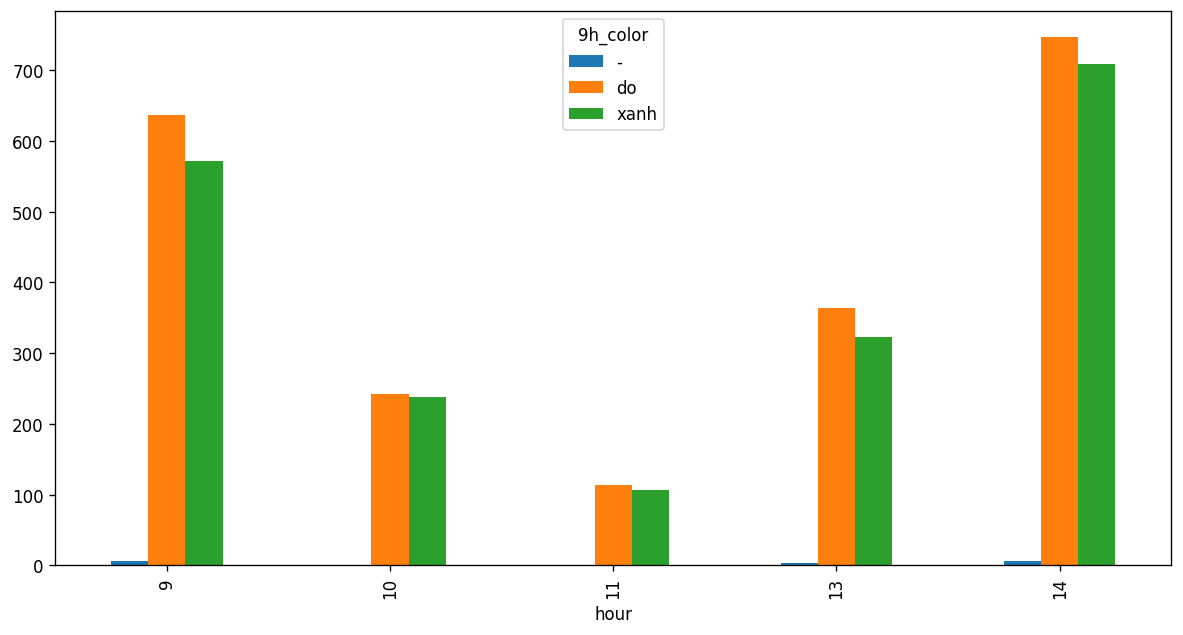

In [10]:
group_by_hour = analytics_data.groupby(['hour', '9h_color'])['hour'].count().rename({'hour': 'count'})
group_by_hour.unstack().plot.bar()

<Axes: xlabel='hour'>

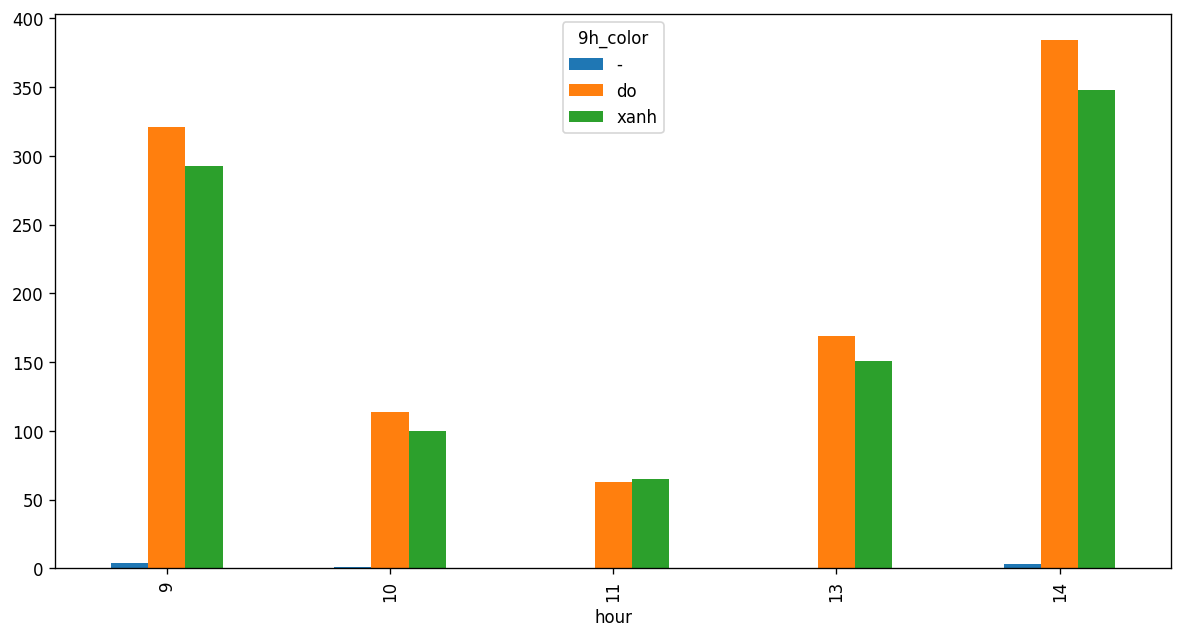

In [11]:
is_min_data = df3[df3.is_min == True]
group_by_hour2 = is_min_data.groupby(['hour', '9h_color'])['hour'].count().rename({'hour': 'count'})
group_by_hour2.unstack().plot.bar()

## 2. RSI & Time analytics

In [12]:
df2 = df_merged.copy()
df2['RSI'] = ta.rsi(df2["Close"], length=14)
df2['RSI'] = round(df2['RSI'])
df2 = df2[(df2.is_max == True) | (df2.is_min == True)].copy()
group_1 = df2[df2.is_min == True]
group_2 = df2[df2.is_max == True]

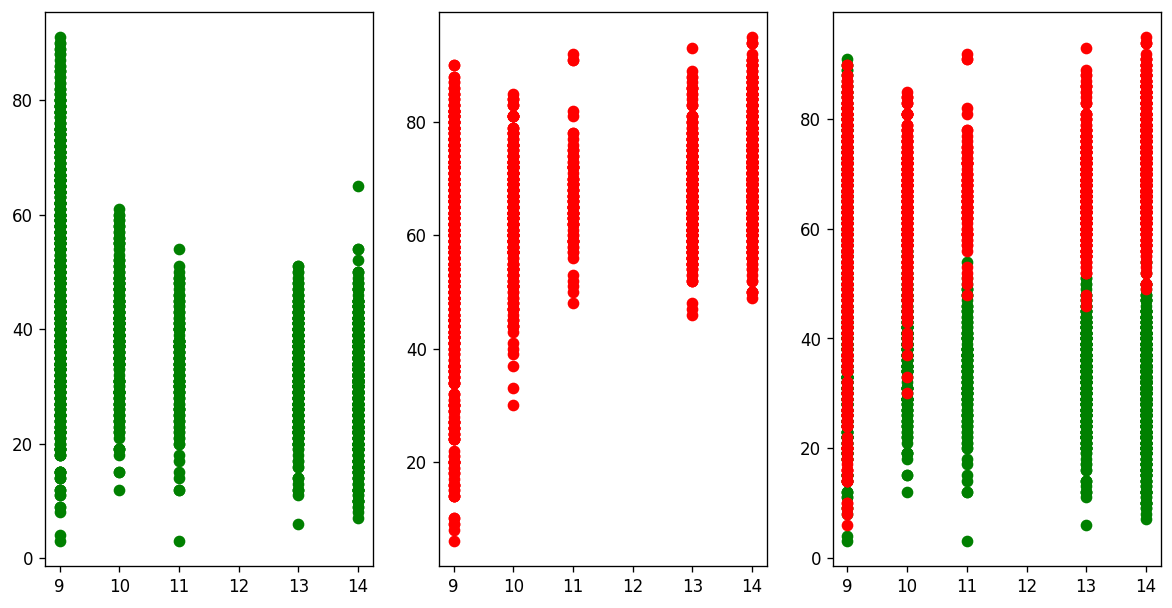

In [13]:
plt.subplot(1, 3, 1)
plt.scatter(group_1['hour'], group_1['RSI'], c='green')
plt.subplot(1, 3, 2)
plt.scatter(group_2['hour'], group_2['RSI'], c='red')
plt.subplot(1, 3, 3)
plt.scatter(group_1['hour'], group_1['RSI'], c='green')
plt.scatter(group_2['hour'], group_2['RSI'], c='red')

In [14]:
# Ket luan:
# 9h rat nhieu trap
# 10hxx neu 10hxx tao gia cao nhat trong ngay, RSI > 40, xuat hien dau hieu dao chieu => Short
# 10hxx neu 10hxx tao gia thap nhat trong ngay, RSI < 60, xuat hien dau hieu dao chieu => Long
# 11hxx neu 11hxx tao gia cao nhat trong ngay, RSI > 45, xuat hien dau hieu dao chieu => Short
# 11hxx neu 11hxx tao gia thap nhat trong ngay, RSI < 55, xuat hien dau hieu dao chieu => Long
# 13hxx neu 13hxx tao gia cao nhat trong ngay, RSI > 45, xuat hien dau hieu dao chieu => Short
# 13hxx neu 13hxx tao gia thap nhat trong ngay, RSI < 55, xuat hien dau hieu dao chieu => Long
# 14hxx neu 14hxx tao gia cao nhat trong ngay, RSI > 45, xuat hien dau hieu dao chieu => Short
# 14hxx neu 14hxx tao gia thap nhat trong ngay, RSI < 55, xuat hien dau hieu dao chieu => Long

## 1. Analytics by Time

In [19]:
min_max_data = df_merged[(df_merged.is_max == True) | (df_merged.is_min == True)].copy()

<Axes: xlabel='hour'>

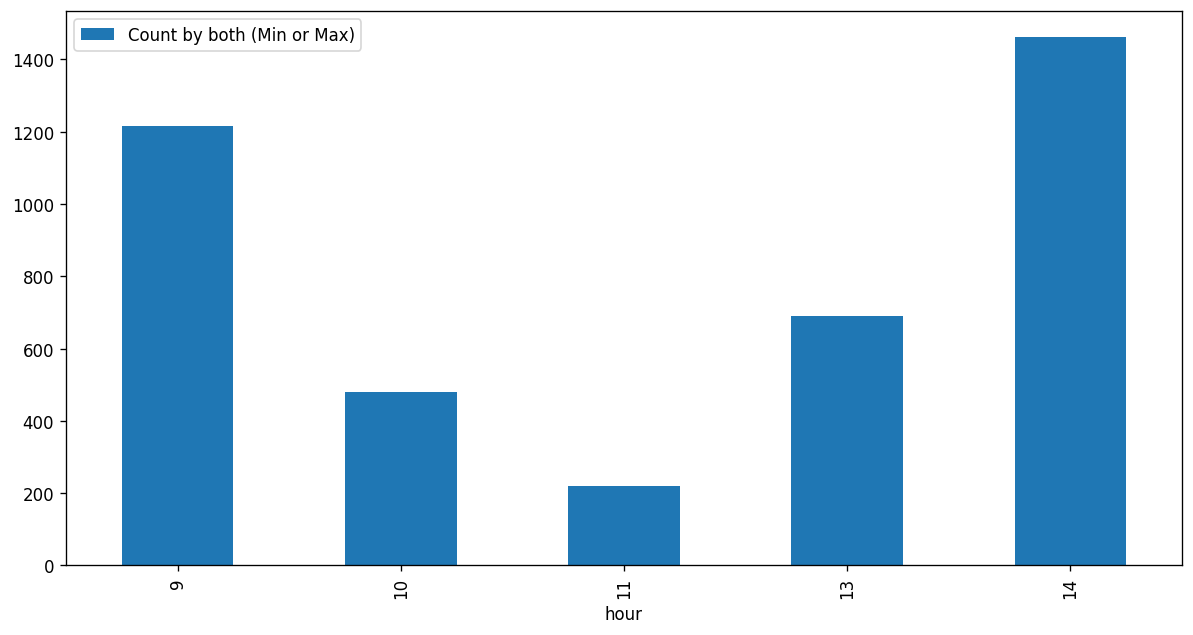

In [29]:
min_max_data_grouped_by_hour = min_max_data.groupby(['hour'])[['Close']].count().rename(columns={"Close": "Count by both (Min or Max)"})
min_max_data_grouped_by_hour.plot.bar()

<Axes: xlabel='hour'>

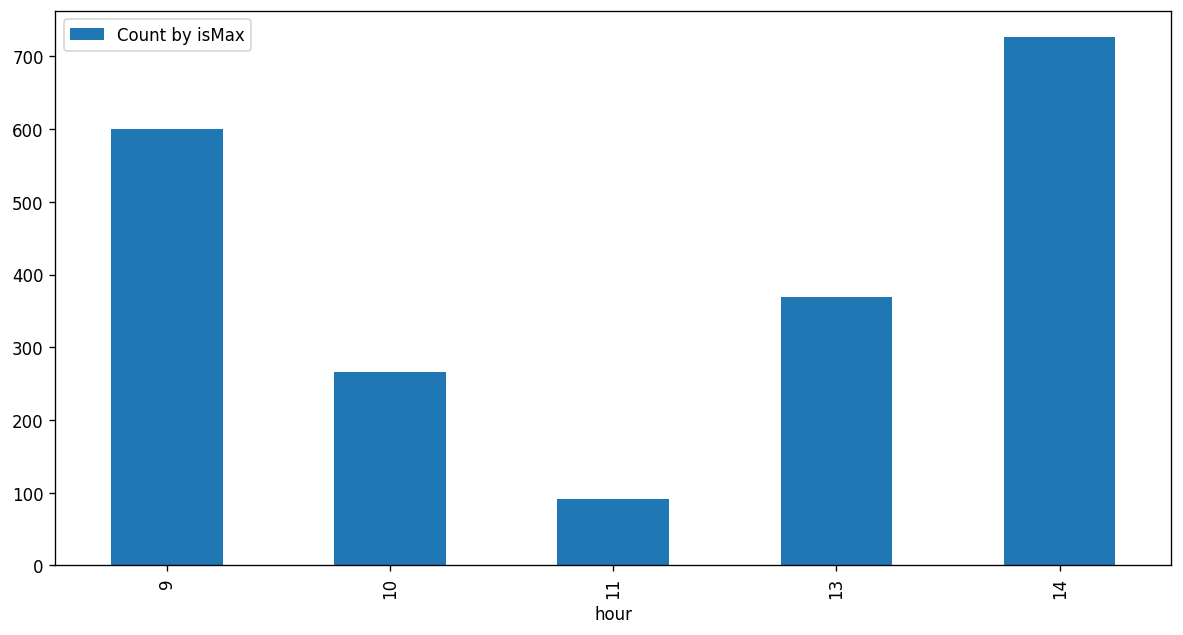

In [27]:
max_data = min_max_data[min_max_data.is_max == True]
max_data_grouped_by_hour = max_data.groupby(['hour'])[['Close']].count().rename(columns={"Close": "Count by isMax"})
max_data_grouped_by_hour.plot.bar()

<Axes: xlabel='hour'>

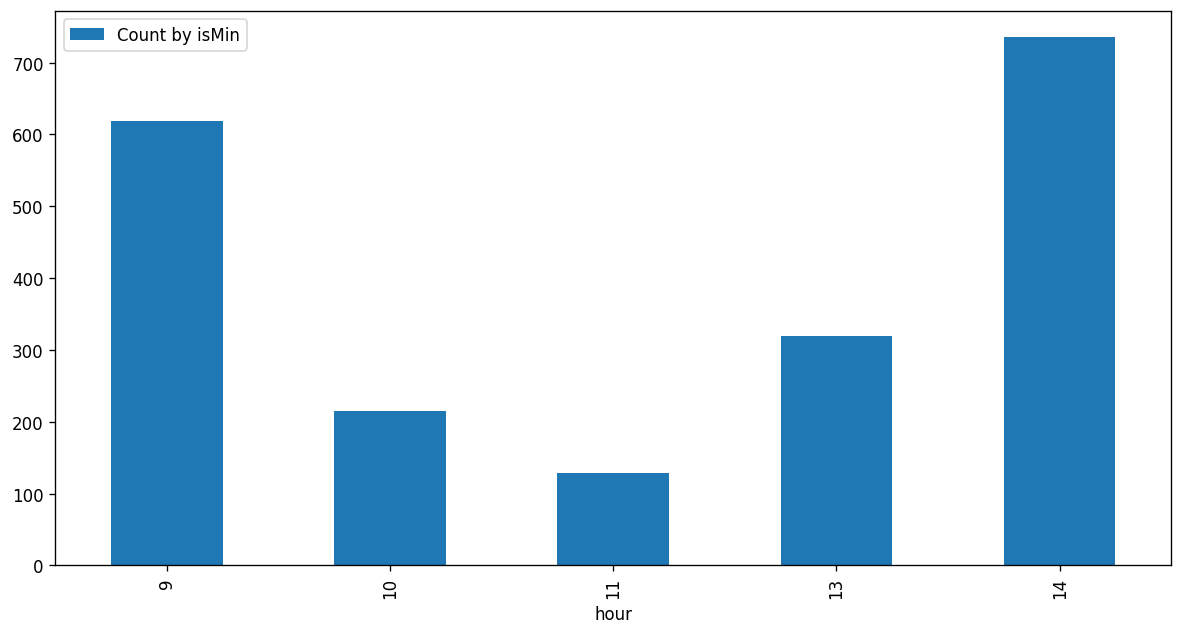

In [26]:
min_data = min_max_data[min_max_data.is_min == True]
min_data_grouped_by_hour = min_data.groupby(['hour'])[['Close']].count().rename(columns={"Close": "Count by isMin"})
min_data_grouped_by_hour.plot.bar()